In [1]:
from QAOAUtils import *
from oputils import *


In [2]:
import matplotlib.lines as mlines
sym = mlines.Line2D([], [], color='#1f77b4', marker='.', linestyle='None',
                          markersize=15, label='MIS')

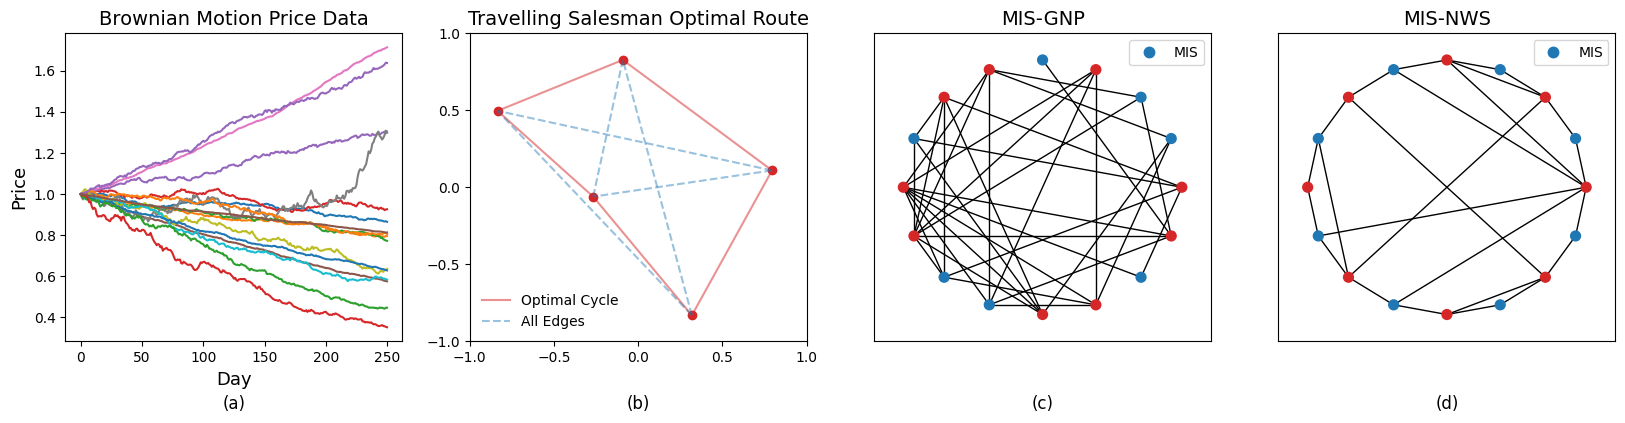

In [3]:
fig,ax = plt.subplots(1,4,figsize=(20,4))


prices =geometric_brownian_prices(max_drift=0.05,max_volatility=0.2,T=250,N=16)
ax[0].plot(prices)
ax[0].set_xlabel("Day", fontsize=13)
ax[0].set_ylabel("Price", fontsize=13)
ax[0].text(0.5,-0.22, "(a)", size=12, ha="center", 
         transform=ax[0].transAxes)
ax[0].set_title("Brownian Motion Price Data", fontsize=14)

m=0
while(m<0.75):
    points,dist,q = TSP_QUBO(5,1) ###resampl until aesthetic
    m=np.min(dist[np.nonzero(dist)])
order = np.concatenate(([0],np.argwhere(np.reshape(brute_force_max01(-q[-1])[0],(4,4))>0)[:,-1]+1,[0]))
ax[1].scatter(*points.T, c='#d62728')
ax[1].plot(*points[[order]].T,'-',label='Optimal Cycle', c='#d62728',alpha=0.5)
edges = [[i,j] for i in range(5) for j in range(i+1,5)]
for e in edges:
    if(e not in np.sort([[order[i],order[i+1]] for i in range(5)],axis=1).tolist()):
        ax[1].plot(*points[[e]].T,'--',alpha=0.45,color='#1f77b4')
ax[1].plot([0],[0],'--',label='All Edges',alpha=0.45,color='#1f77b4')
ax[1].legend(frameon=False)
x_min, x_max = -1, 1
y_min, y_max = -1, 1
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(y_min, y_max)
x_range = x_max - x_min
y_range = y_max - y_min
tick_step = 0.5  # Example step size
ax[1].set_xticks(np.arange(x_min, x_max + tick_step, tick_step))
ax[1].set_yticks(np.arange(y_min, y_max + tick_step, tick_step))
ax[1].set_title("Travelling Salesman Optimal Route", fontsize=14)
ax[1].set_xlim(-1,1)
ax[1].set_ylim(-1,1)
ax[1].text(0.5,-0.22, "(b)", size=12, ha="center", 
         transform=ax[1].transAxes)

ax[2].set_title("MIS-GNP", fontsize=14)
ax[2].text(0.5,-0.22, "(c)", size=12, ha="center", 
         transform=ax[2].transAxes)
G=sample_graph(16)
pos = nx.circular_layout(G)#,k=.35)
l=np.argwhere(brute_force_max01(np.diag(np.ones(16))- (1.1/2) *nx.adjacency_matrix(G).toarray())[0]>0)[:,0]
nx.draw_networkx(G, pos,ax=ax[2],node_size=50,with_labels=False,node_color=['#1f77b4' if i in l else "#d62728" for i in range(16)])
ax[2].legend(handles=[sym])

ax[3].set_title("MIS-NWS", fontsize=14)
ax[3].text(0.5,-0.22, "(d)", size=12, ha="center", 
         transform=ax[3].transAxes)
G=sample_graph(16,"nws")
pos = nx.circular_layout(G)#,k=.75)
l=np.argwhere(brute_force_max01(np.diag(np.ones(16))- (1.1/2) *nx.adjacency_matrix(G).toarray())[0]>0)[:,0]
nx.draw_networkx(G, pos,ax=ax[3],node_size=50,with_labels=False,node_color=["#1f77b4" if i in l else "#d62728" for i in range(16)])
ax[3].legend(handles=[sym])
fig.savefig('Problem_Visualizer.pdf', dpi=300,bbox_inches="tight")
